# Statistics Case Study - Shailesh

In [114]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [115]:
# Import the numpy and pandas packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
from datetime import datetime

In [116]:
# Read the CSV file into the dataframe gramener

df=pd.read_csv("loan.csv")
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade            ...              \
0   10.65%       162.87     B        B2            ...               
1   15.27%        59.83     C        C4            ...               
2   15.96%        84.33     C        C5            ...               
3   13.49%       339.31     C        C1            ...               
4   12.69%        67.79     B        B5            ...               

  num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75  \
0                NaN                NaN            NaN               NaN   
1                NaN                NaN            NaN               NaN   
2                NaN                NaN            NaN               NaN   
3                NaN                NaN            NaN               NaN   
4                NaN                NaN            NaN               NaN   

  pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort  \
0                  0.0       0.0             NaN               NaN   
1                  0.0       0.0             NaN               NaN   
2                  0.0       0.0             NaN               NaN   
3                  0.0       0.0             NaN               NaN   
4                  0.0       0.0             NaN               NaN   

  total_bc_limit total_il_high_credit_limit  
0            NaN                        NaN  
1            NaN                        NaN  
2            NaN                        NaN  
3            NaN                        NaN  
4            NaN                        NaN  

[5 rows x 111 columns]

In [117]:
# Check the Different attributes of uberdata dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [118]:
# Check the counts of the columns in uberdata dataframe

df.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths             ...              \
count  39717.000000    39717.000000             ...               
mean       0.146512        0.869200             ...               
std        0.491812        1.070219             ...               
min        0.000000        0.000000             ...               
25%        0.000000        0.000000             ...               
50%        0.000000        1.000000             ...               
75%        0.000000        1.000000             ...               
max       11.000000        8.000000             ...               

       num_tl_90g_dpd_24m  num_tl_op_past_12m  pct_tl_nvr_dlq  \
count                 0.0                 0.0             0.0   
mean                  NaN                 NaN             NaN   
std                   NaN                 NaN             NaN   
min                   NaN                 NaN             NaN   
25%                   NaN                 NaN             NaN   
50%                   NaN                 NaN             NaN   
75%                   NaN                 NaN             NaN   
max                   NaN                 NaN             NaN   

       percent_bc_gt_75  pub_rec_bankruptcies  tax_liens  tot_hi_cred_lim  \
count               0.0          39020.000000    39678.0              0.0   
mean                NaN              0.043260        0.0              NaN   
std                 NaN              0.204324        0.0              NaN   
min                 NaN              0.000000        0.0              NaN   
25%                 NaN              0.000000        0.0              NaN   
50%                 NaN              0.000000        0.0              NaN   
75%                 NaN              0.000000        0.0              NaN   
max                 NaN              2.000000        0.0              NaN   

       total_bal_ex_mort  total_bc_limit  total_il_high_credit_limit  
count                0.0             0.0                         0.0  
mean                 NaN             NaN                         NaN  
std                  NaN             NaN                         NaN  
min                  NaN             NaN                         NaN  
25%                  NaN             NaN                         NaN  
50%                  NaN             NaN                         NaN  
75%                  NaN             NaN                         NaN  
max                  NaN             NaN                         NaN  

[8 rows x 87 columns]

In [119]:
#Check the overall count in the dataset

df.shape

(39717, 111)

In [120]:
# Check the count of Null Values in the Dataset

df.isnull().sum().sort_values(ascending = False)

total_il_high_credit_limit     39717
mo_sin_old_rev_tl_op           39717
bc_util                        39717
bc_open_to_buy                 39717
avg_cur_bal                    39717
acc_open_past_24mths           39717
inq_last_12m                   39717
total_cu_tl                    39717
inq_fi                         39717
total_rev_hi_lim               39717
all_util                       39717
max_bal_bc                     39717
open_rv_24m                    39717
open_rv_12m                    39717
il_util                        39717
total_bal_il                   39717
mths_since_rcnt_il             39717
open_il_24m                    39717
open_il_12m                    39717
open_il_6m                     39717
open_acc_6m                    39717
tot_cur_bal                    39717
tot_coll_amt                   39717
total_bc_limit                 39717
dti_joint                      39717
annual_inc_joint               39717
mths_since_last_major_derog    39717
m

In [121]:
# Check the % of Records which is null

round(100*df.isnull().sum()/len(df.index),2).sort_values(ascending = False)

total_il_high_credit_limit     100.0
mo_sin_old_rev_tl_op           100.0
bc_util                        100.0
bc_open_to_buy                 100.0
avg_cur_bal                    100.0
acc_open_past_24mths           100.0
inq_last_12m                   100.0
total_cu_tl                    100.0
inq_fi                         100.0
total_rev_hi_lim               100.0
all_util                       100.0
max_bal_bc                     100.0
open_rv_24m                    100.0
open_rv_12m                    100.0
il_util                        100.0
total_bal_il                   100.0
mths_since_rcnt_il             100.0
open_il_24m                    100.0
open_il_12m                    100.0
open_il_6m                     100.0
open_acc_6m                    100.0
tot_cur_bal                    100.0
tot_coll_amt                   100.0
total_bc_limit                 100.0
dti_joint                      100.0
annual_inc_joint               100.0
mths_since_last_major_derog    100.0
m

In [122]:
# Check the Shape of the Dataset

df.shape

(39717, 111)

In [123]:
df=df.dropna(axis=1,how='all')

In [124]:
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade    ...    next_pymnt_d  \
0   10.65%       162.87     B        B2    ...             NaN   
1   15.27%        59.83     C        C4    ...             NaN   
2   15.96%        84.33     C        C5    ...             NaN   
3   13.49%       339.31     C        C1    ...             NaN   
4   12.69%        67.79     B        B5    ...          Jun-16   

  last_credit_pull_d collections_12_mths_ex_med  policy_code application_type  \
0             May-16                        0.0            1       INDIVIDUAL   
1             Sep-13                        0.0            1       INDIVIDUAL   
2             May-16                        0.0            1       INDIVIDUAL   
3             Apr-16                        0.0            1       INDIVIDUAL   
4             May-16                        0.0            1       INDIVIDUAL   

  acc_now_delinq chargeoff_within_12_mths delinq_amnt pub_rec_bankruptcies  \
0              0                      0.0           0                  0.0   
1              0                      0.0           0                  0.0   
2              0                      0.0           0                  0.0   
3              0                      0.0           0                  0.0   
4              0                      0.0           0                  0.0   

  tax_liens  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  

[5 rows x 57 columns]

In [125]:
# Drop Extra Columns

df=df.drop(['next_pymnt_d','mths_since_last_record','mths_since_last_delinq','url','application_type',
                   'policy_code','collections_12_mths_ex_med','acc_now_delinq','delinq_amnt','chargeoff_within_12_mths',
                   'tax_liens','emp_title','pymnt_plan','desc','pub_rec_bankruptcies', 'last_credit_pull_d'],axis = 1)
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade       ...       out_prncp_inv  \
0   10.65%       162.87     B        B2       ...                0.00   
1   15.27%        59.83     C        C4       ...                0.00   
2   15.96%        84.33     C        C5       ...                0.00   
3   13.49%       339.31     C        C1       ...                0.00   
4   12.69%        67.79     B        B5       ...              524.06   

    total_pymnt  total_pymnt_inv total_rec_prncp total_rec_int  \
0   5863.155187          5833.84         5000.00        863.16   
1   1008.710000          1008.71          456.46        435.17   
2   3005.666844          3005.67         2400.00        605.67   
3  12231.890000         12231.89        10000.00       2214.92   
4   3513.330000          3513.33         2475.94       1037.39   

  total_rec_late_fee recoveries collection_recovery_fee last_pymnt_d  \
0               0.00       0.00                    0.00       Jan-15   
1               0.00     117.08                    1.11       Apr-13   
2               0.00       0.00                    0.00       Jun-14   
3              16.97       0.00                    0.00       Jan-15   
4               0.00       0.00                    0.00       May-16   

  last_pymnt_amnt  
0          171.62  
1          119.66  
2          649.91  
3          357.48  
4           67.79  

[5 rows x 41 columns]

In [126]:
# Check % of Nulls

round(100*df.isnull().sum()/len(df.index),2).sort_values(ascending = False)

last_pymnt_d               0.18
revol_util                 0.13
title                      0.03
emp_length                 0.00
purpose                    0.00
loan_status                0.00
issue_d                    0.00
verification_status        0.00
annual_inc                 0.00
home_ownership             0.00
last_pymnt_amnt            0.00
zip_code                   0.00
grade                      0.00
installment                0.00
int_rate                   0.00
term                       0.00
funded_amnt_inv            0.00
funded_amnt                0.00
loan_amnt                  0.00
member_id                  0.00
sub_grade                  0.00
dti                        0.00
addr_state                 0.00
out_prncp_inv              0.00
collection_recovery_fee    0.00
recoveries                 0.00
total_rec_late_fee         0.00
total_rec_int              0.00
total_rec_prncp            0.00
total_pymnt_inv            0.00
total_pymnt                0.00
out_prnc

In [77]:
# Check the Shape of the Columns
df.shape

(39717, 41)

In [127]:
# Remove the Blanks
df = df[pd.notnull(df['emp_length'])]
df = df[pd.notnull(df['title'])]
df = df[pd.notnull(df['last_pymnt_d'])]
df = df[pd.notnull(df['revol_util'])]
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade       ...       out_prncp_inv  \
0   10.65%       162.87     B        B2       ...                0.00   
1   15.27%        59.83     C        C4       ...                0.00   
2   15.96%        84.33     C        C5       ...                0.00   
3   13.49%       339.31     C        C1       ...                0.00   
4   12.69%        67.79     B        B5       ...              524.06   

    total_pymnt  total_pymnt_inv total_rec_prncp total_rec_int  \
0   5863.155187          5833.84         5000.00        863.16   
1   1008.710000          1008.71          456.46        435.17   
2   3005.666844          3005.67         2400.00        605.67   
3  12231.890000         12231.89        10000.00       2214.92   
4   3513.330000          3513.33         2475.94       1037.39   

  total_rec_late_fee recoveries collection_recovery_fee last_pymnt_d  \
0               0.00       0.00                    0.00       Jan-15   
1               0.00     117.08                    1.11       Apr-13   
2               0.00       0.00                    0.00       Jun-14   
3              16.97       0.00                    0.00       Jan-15   
4               0.00       0.00                    0.00       May-16   

  last_pymnt_amnt  
0          171.62  
1          119.66  
2          649.91  
3          357.48  
4           67.79  

[5 rows x 41 columns]

In [129]:
# Check the Shape of the Columns
df.shape

(39590, 41)

In [130]:
# Check % of Nulls
round(100*df.isnull().sum()/len(df.index),2).sort_values(ascending = False)

last_pymnt_amnt            0.0
addr_state                 0.0
title                      0.0
purpose                    0.0
loan_status                0.0
issue_d                    0.0
verification_status        0.0
annual_inc                 0.0
home_ownership             0.0
emp_length                 0.0
sub_grade                  0.0
grade                      0.0
installment                0.0
int_rate                   0.0
term                       0.0
funded_amnt_inv            0.0
funded_amnt                0.0
loan_amnt                  0.0
member_id                  0.0
zip_code                   0.0
dti                        0.0
last_pymnt_d               0.0
delinq_2yrs                0.0
collection_recovery_fee    0.0
recoveries                 0.0
total_rec_late_fee         0.0
total_rec_int              0.0
total_rec_prncp            0.0
total_pymnt_inv            0.0
total_pymnt                0.0
out_prncp_inv              0.0
out_prncp                  0.0
initial_

### Data is Cleaned

In [131]:
# Create Readable columns
df['term'] = df['term'].str.replace('36 months', '3 YEARS')
df['term'] = df['term'].str.replace('60 months', '5 YEARS')

In [132]:

df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv      term  \
0  1077501    1296599       5000         5000           4975.0   3 YEARS   
1  1077430    1314167       2500         2500           2500.0   5 YEARS   
2  1077175    1313524       2400         2400           2400.0   3 YEARS   
3  1076863    1277178      10000        10000          10000.0   3 YEARS   
4  1075358    1311748       3000         3000           3000.0   5 YEARS   

  int_rate  installment grade sub_grade       ...       out_prncp_inv  \
0   10.65%       162.87     B        B2       ...                0.00   
1   15.27%        59.83     C        C4       ...                0.00   
2   15.96%        84.33     C        C5       ...                0.00   
3   13.49%       339.31     C        C1       ...                0.00   
4   12.69%        67.79     B        B5       ...              524.06   

    total_pymnt  total_pymnt_inv total_rec_prncp total_rec_int  \
0   5863.155187          5833.84         5000.00        863.16   
1   1008.710000          1008.71          456.46        435.17   
2   3005.666844          3005.67         2400.00        605.67   
3  12231.890000         12231.89        10000.00       2214.92   
4   3513.330000          3513.33         2475.94       1037.39   

  total_rec_late_fee recoveries collection_recovery_fee last_pymnt_d  \
0               0.00       0.00                    0.00       Jan-15   
1               0.00     117.08                    1.11       Apr-13   
2               0.00       0.00                    0.00       Jun-14   
3              16.97       0.00                    0.00       Jan-15   
4               0.00       0.00                    0.00       May-16   

  last_pymnt_amnt  
0          171.62  
1          119.66  
2          649.91  
3          357.48  
4           67.79  

[5 rows x 41 columns]

In [133]:
# Replace % with blanks

df['int_rate'] = df['int_rate'].str.replace('%', '')
df['revol_util'] = df['revol_util'].str.replace('%', '')
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv      term  \
0  1077501    1296599       5000         5000           4975.0   3 YEARS   
1  1077430    1314167       2500         2500           2500.0   5 YEARS   
2  1077175    1313524       2400         2400           2400.0   3 YEARS   
3  1076863    1277178      10000        10000          10000.0   3 YEARS   
4  1075358    1311748       3000         3000           3000.0   5 YEARS   

  int_rate  installment grade sub_grade       ...       out_prncp_inv  \
0    10.65       162.87     B        B2       ...                0.00   
1    15.27        59.83     C        C4       ...                0.00   
2    15.96        84.33     C        C5       ...                0.00   
3    13.49       339.31     C        C1       ...                0.00   
4    12.69        67.79     B        B5       ...              524.06   

    total_pymnt  total_pymnt_inv total_rec_prncp total_rec_int  \
0   5863.155187          5833.84         5000.00        863.16   
1   1008.710000          1008.71          456.46        435.17   
2   3005.666844          3005.67         2400.00        605.67   
3  12231.890000         12231.89        10000.00       2214.92   
4   3513.330000          3513.33         2475.94       1037.39   

  total_rec_late_fee recoveries collection_recovery_fee last_pymnt_d  \
0               0.00       0.00                    0.00       Jan-15   
1               0.00     117.08                    1.11       Apr-13   
2               0.00       0.00                    0.00       Jun-14   
3              16.97       0.00                    0.00       Jan-15   
4               0.00       0.00                    0.00       May-16   

  last_pymnt_amnt  
0          171.62  
1          119.66  
2          649.91  
3          357.48  
4           67.79  

[5 rows x 41 columns]

In [134]:
# Convert Cases to uppercase wherever required
df['verification_status'] = df['verification_status'].str.upper()
df['loan_status'] = df['loan_status'].str.upper()
df['purpose'] = df['purpose'].str.upper()
df['title'] = df['title'].str.upper()

In [135]:
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv      term  \
0  1077501    1296599       5000         5000           4975.0   3 YEARS   
1  1077430    1314167       2500         2500           2500.0   5 YEARS   
2  1077175    1313524       2400         2400           2400.0   3 YEARS   
3  1076863    1277178      10000        10000          10000.0   3 YEARS   
4  1075358    1311748       3000         3000           3000.0   5 YEARS   

  int_rate  installment grade sub_grade       ...       out_prncp_inv  \
0    10.65       162.87     B        B2       ...                0.00   
1    15.27        59.83     C        C4       ...                0.00   
2    15.96        84.33     C        C5       ...                0.00   
3    13.49       339.31     C        C1       ...                0.00   
4    12.69        67.79     B        B5       ...              524.06   

    total_pymnt  total_pymnt_inv total_rec_prncp total_rec_int  \
0   5863.155187          5833.84         5000.00        863.16   
1   1008.710000          1008.71          456.46        435.17   
2   3005.666844          3005.67         2400.00        605.67   
3  12231.890000         12231.89        10000.00       2214.92   
4   3513.330000          3513.33         2475.94       1037.39   

  total_rec_late_fee recoveries collection_recovery_fee last_pymnt_d  \
0               0.00       0.00                    0.00       Jan-15   
1               0.00     117.08                    1.11       Apr-13   
2               0.00       0.00                    0.00       Jun-14   
3              16.97       0.00                    0.00       Jan-15   
4               0.00       0.00                    0.00       May-16   

  last_pymnt_amnt  
0          171.62  
1          119.66  
2          649.91  
3          357.48  
4           67.79  

[5 rows x 41 columns]

In [136]:
# Create Calculated columns

df.loc[df['emp_length'].isin(['< 1 year','1 year']), 'exp_level'] = 'FRESHER'
df.loc[df['emp_length'].isin(['2 years','3 years','4 years']), 'exp_level'] = 'BEGINNER'
df.loc[df['emp_length'].isin(['5 years','6 years','7 years']), 'exp_level'] = 'INTERMEDIATE'
df.loc[df['emp_length'].isin(['8 years','9 years','10+ years']), 'exp_level'] = 'EXPERT'
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv      term  \
0  1077501    1296599       5000         5000           4975.0   3 YEARS   
1  1077430    1314167       2500         2500           2500.0   5 YEARS   
2  1077175    1313524       2400         2400           2400.0   3 YEARS   
3  1076863    1277178      10000        10000          10000.0   3 YEARS   
4  1075358    1311748       3000         3000           3000.0   5 YEARS   

  int_rate  installment grade sub_grade    ...      total_pymnt  \
0    10.65       162.87     B        B2    ...      5863.155187   
1    15.27        59.83     C        C4    ...      1008.710000   
2    15.96        84.33     C        C5    ...      3005.666844   
3    13.49       339.31     C        C1    ...     12231.890000   
4    12.69        67.79     B        B5    ...      3513.330000   

  total_pymnt_inv  total_rec_prncp total_rec_int total_rec_late_fee  \
0         5833.84          5000.00        863.16               0.00   
1         1008.71           456.46        435.17               0.00   
2         3005.67          2400.00        605.67               0.00   
3        12231.89         10000.00       2214.92              16.97   
4         3513.33          2475.94       1037.39               0.00   

  recoveries collection_recovery_fee last_pymnt_d last_pymnt_amnt exp_level  
0       0.00                    0.00       Jan-15          171.62    EXPERT  
1     117.08                    1.11       Apr-13          119.66   FRESHER  
2       0.00                    0.00       Jun-14          649.91    EXPERT  
3       0.00                    0.00       Jan-15          357.48    EXPERT  
4       0.00                    0.00       May-16           67.79   FRESHER  

[5 rows x 42 columns]

In [137]:
# Convert the 'int_rate' column to float

df['int_rate'] = df['int_rate'].astype('float')

In [138]:
# Create Calculated columns for exp_level

df.loc[df['int_rate'].between(5, 10, inclusive=True), 'int_rate_slot'] = '5-10'
df.loc[df['int_rate'].between(10, 15, inclusive=True), 'int_rate_slot'] = '10-15'
df.loc[df['int_rate'].between(15, 20, inclusive=True), 'int_rate_slot'] = '15-20'
df.loc[df['int_rate'].between(20, 25, inclusive=True), 'int_rate_slot'] = '20-25'
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv      term  \
0  1077501    1296599       5000         5000           4975.0   3 YEARS   
1  1077430    1314167       2500         2500           2500.0   5 YEARS   
2  1077175    1313524       2400         2400           2400.0   3 YEARS   
3  1076863    1277178      10000        10000          10000.0   3 YEARS   
4  1075358    1311748       3000         3000           3000.0   5 YEARS   

   int_rate  installment grade sub_grade      ...      total_pymnt_inv  \
0     10.65       162.87     B        B2      ...              5833.84   
1     15.27        59.83     C        C4      ...              1008.71   
2     15.96        84.33     C        C5      ...              3005.67   
3     13.49       339.31     C        C1      ...             12231.89   
4     12.69        67.79     B        B5      ...              3513.33   

  total_rec_prncp  total_rec_int total_rec_late_fee recoveries  \
0         5000.00         863.16               0.00       0.00   
1          456.46         435.17               0.00     117.08   
2         2400.00         605.67               0.00       0.00   
3        10000.00        2214.92              16.97       0.00   
4         2475.94        1037.39               0.00       0.00   

  collection_recovery_fee last_pymnt_d last_pymnt_amnt exp_level int_rate_slot  
0                    0.00       Jan-15          171.62    EXPERT         10-15  
1                    1.11       Apr-13          119.66   FRESHER         15-20  
2                    0.00       Jun-14          649.91    EXPERT         15-20  
3                    0.00       Jan-15          357.48    EXPERT         10-15  
4                    0.00       May-16           67.79   FRESHER         10-15  

[5 rows x 43 columns]

In [139]:
# Create Calculated columns for DTI

df.loc[df['dti'].between(0, 5, inclusive=True), 'dti_bucket'] = '0-5'
df.loc[df['dti'].between(5, 10, inclusive=True), 'dti_bucket'] = '5-10'
df.loc[df['dti'].between(10, 15, inclusive=True), 'dti_bucket'] = '10-15'
df.loc[df['dti'].between(15, 20, inclusive=True), 'dti_bucket'] = '15-20'
df.loc[df['dti'].between(20, 25, inclusive=True), 'dti_bucket'] = '20-25'
df.loc[df['dti'].between(25, 30, inclusive=True), 'dti_bucket'] = '25-30'
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv      term  \
0  1077501    1296599       5000         5000           4975.0   3 YEARS   
1  1077430    1314167       2500         2500           2500.0   5 YEARS   
2  1077175    1313524       2400         2400           2400.0   3 YEARS   
3  1076863    1277178      10000        10000          10000.0   3 YEARS   
4  1075358    1311748       3000         3000           3000.0   5 YEARS   

   int_rate  installment grade sub_grade    ...     total_rec_prncp  \
0     10.65       162.87     B        B2    ...             5000.00   
1     15.27        59.83     C        C4    ...              456.46   
2     15.96        84.33     C        C5    ...             2400.00   
3     13.49       339.31     C        C1    ...            10000.00   
4     12.69        67.79     B        B5    ...             2475.94   

  total_rec_int  total_rec_late_fee recoveries collection_recovery_fee  \
0        863.16                0.00       0.00                    0.00   
1        435.17                0.00     117.08                    1.11   
2        605.67                0.00       0.00                    0.00   
3       2214.92               16.97       0.00                    0.00   
4       1037.39                0.00       0.00                    0.00   

  last_pymnt_d last_pymnt_amnt exp_level int_rate_slot dti_bucket  
0       Jan-15          171.62    EXPERT         10-15      25-30  
1       Apr-13          119.66   FRESHER         15-20        0-5  
2       Jun-14          649.91    EXPERT         15-20       5-10  
3       Jan-15          357.48    EXPERT         10-15      20-25  
4       May-16           67.79   FRESHER         10-15      15-20  

[5 rows x 44 columns]

In [140]:
# Format the Date columns

df['issue_d'] =  pd.to_datetime(df['issue_d'], format='%b-%y')
df

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv      term  \
0      1077501    1296599       5000         5000       4975.00000   3 YEARS   
1      1077430    1314167       2500         2500       2500.00000   5 YEARS   
2      1077175    1313524       2400         2400       2400.00000   3 YEARS   
3      1076863    1277178      10000        10000      10000.00000   3 YEARS   
4      1075358    1311748       3000         3000       3000.00000   5 YEARS   
5      1075269    1311441       5000         5000       5000.00000   3 YEARS   
6      1069639    1304742       7000         7000       7000.00000   5 YEARS   
7      1072053    1288686       3000         3000       3000.00000   3 YEARS   
8      1071795    1306957       5600         5600       5600.00000   5 YEARS   
9      1071570    1306721       5375         5375       5350.00000   5 YEARS   
10     1070078    1305201       6500         6500       6500.00000   5 YEARS   
11     1069908    1305008      12000        12000      12000.00000   3 YEARS   
12     1064687    1298717       9000         9000       9000.00000   3 YEARS   
13     1069866    1304956       3000         3000       3000.00000   3 YEARS   
14     1069057    1303503      10000        10000      10000.00000   3 YEARS   
15     1069759    1304871       1000         1000       1000.00000   3 YEARS   
16     1065775    1299699      10000        10000      10000.00000   3 YEARS   
17     1069971    1304884       3600         3600       3600.00000   3 YEARS   
18     1062474    1294539       6000         6000       6000.00000   3 YEARS   
19     1069742    1304855       9200         9200       9200.00000   3 YEARS   
20     1069740    1284848      20250        20250      19142.16108   5 YEARS   
21     1039153    1269083      21000        21000      21000.00000   3 YEARS   
22     1069710    1304821      10000        10000      10000.00000   3 YEARS   
23     1069700    1304810      10000        10000      10000.00000   3 YEARS   
24     1069559    1304634       6000         6000       6000.00000   3 YEARS   
25     1069697    1273773      15000        15000      15000.00000   3 YEARS   
27     1069657    1304764       5000         5000       5000.00000   5 YEARS   
28     1069799    1304678       4000         4000       4000.00000   3 YEARS   
29     1047704    1278806       8500         8500       8500.00000   3 YEARS   
30     1032111    1261745       4375         4375       4375.00000   3 YEARS   
...        ...        ...        ...          ...              ...       ...   
39687   111307     105982      12000        12000       2500.00000   3 YEARS   
39688   111227     111223      20000        20000       2800.00000   3 YEARS   
39689   109355     109346       1200         1200          0.00000   3 YEARS   
39690   107136     107130      12250        12250       1525.00000   3 YEARS   
39691   106360     106333       2700         2700        550.00000   3 YEARS   
39692    76597      76583       5000         5000       1775.00000   3 YEARS   
39693   106079     106039       3500         3500       1200.00000   3 YEARS   
39694    90966      90962       5000         5000       4150.00000   3 YEARS   
39695    92440      92423       5000         5000       3100.00000   3 YEARS   
39696   102376      95212      25000        25000        525.00000   3 YEARS   
39697   101579     100083      10000        10000        400.00000   3 YEARS   
39698    98982      98957       5000         5000        675.00000   3 YEARS   
39699    98339      97572       5100         5100        575.00000   3 YEARS   
39700    98276      98268       5400         5400        200.00000   3 YEARS   
39701    96844      95222       5300         5300        600.00000   3 YEARS   
39702    96350      96338       5000         5000        850.00000   3 YEARS   
39703    94838      73673       3000         3000       2550.00000   3 YEARS   
39704    93277      93254       3000         3000        950.00000   3 YEARS   
39705    930

In [141]:
# Dervive New Date columns

df['Year'] = pd.DatetimeIndex(df['issue_d']).year
df['Month'] = pd.DatetimeIndex(df['issue_d']).month

df

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv      term  \
0      1077501    1296599       5000         5000       4975.00000   3 YEARS   
1      1077430    1314167       2500         2500       2500.00000   5 YEARS   
2      1077175    1313524       2400         2400       2400.00000   3 YEARS   
3      1076863    1277178      10000        10000      10000.00000   3 YEARS   
4      1075358    1311748       3000         3000       3000.00000   5 YEARS   
5      1075269    1311441       5000         5000       5000.00000   3 YEARS   
6      1069639    1304742       7000         7000       7000.00000   5 YEARS   
7      1072053    1288686       3000         3000       3000.00000   3 YEARS   
8      1071795    1306957       5600         5600       5600.00000   5 YEARS   
9      1071570    1306721       5375         5375       5350.00000   5 YEARS   
10     1070078    1305201       6500         6500       6500.00000   5 YEARS   
11     1069908    1305008      12000        12000      12000.00000   3 YEARS   
12     1064687    1298717       9000         9000       9000.00000   3 YEARS   
13     1069866    1304956       3000         3000       3000.00000   3 YEARS   
14     1069057    1303503      10000        10000      10000.00000   3 YEARS   
15     1069759    1304871       1000         1000       1000.00000   3 YEARS   
16     1065775    1299699      10000        10000      10000.00000   3 YEARS   
17     1069971    1304884       3600         3600       3600.00000   3 YEARS   
18     1062474    1294539       6000         6000       6000.00000   3 YEARS   
19     1069742    1304855       9200         9200       9200.00000   3 YEARS   
20     1069740    1284848      20250        20250      19142.16108   5 YEARS   
21     1039153    1269083      21000        21000      21000.00000   3 YEARS   
22     1069710    1304821      10000        10000      10000.00000   3 YEARS   
23     1069700    1304810      10000        10000      10000.00000   3 YEARS   
24     1069559    1304634       6000         6000       6000.00000   3 YEARS   
25     1069697    1273773      15000        15000      15000.00000   3 YEARS   
27     1069657    1304764       5000         5000       5000.00000   5 YEARS   
28     1069799    1304678       4000         4000       4000.00000   3 YEARS   
29     1047704    1278806       8500         8500       8500.00000   3 YEARS   
30     1032111    1261745       4375         4375       4375.00000   3 YEARS   
...        ...        ...        ...          ...              ...       ...   
39687   111307     105982      12000        12000       2500.00000   3 YEARS   
39688   111227     111223      20000        20000       2800.00000   3 YEARS   
39689   109355     109346       1200         1200          0.00000   3 YEARS   
39690   107136     107130      12250        12250       1525.00000   3 YEARS   
39691   106360     106333       2700         2700        550.00000   3 YEARS   
39692    76597      76583       5000         5000       1775.00000   3 YEARS   
39693   106079     106039       3500         3500       1200.00000   3 YEARS   
39694    90966      90962       5000         5000       4150.00000   3 YEARS   
39695    92440      92423       5000         5000       3100.00000   3 YEARS   
39696   102376      95212      25000        25000        525.00000   3 YEARS   
39697   101579     100083      10000        10000        400.00000   3 YEARS   
39698    98982      98957       5000         5000        675.00000   3 YEARS   
39699    98339      97572       5100         5100        575.00000   3 YEARS   
39700    98276      98268       5400         5400        200.00000   3 YEARS   
39701    96844      95222       5300         5300        600.00000   3 YEARS   
39702    96350      96338       5000         5000        850.00000   3 YEARS   
39703    94838      73673       3000         3000       2550.00000   3 YEARS   
39704    93277      93254       3000         3000        950.00000   3 YEARS   
39705    930

In [142]:
# Split the Year Counts
year_split=df.groupby('Year')[['id']].count()
year_split

id
Year       
2007    251
2008   1554
2009   4691
2010  11484
2011  21610

In [144]:
# Export the Final Cleaned File in Tableau for Analysis
df.to_csv("stats_final.csv")

### Plots

Text(0.5,1,'No. of applications')

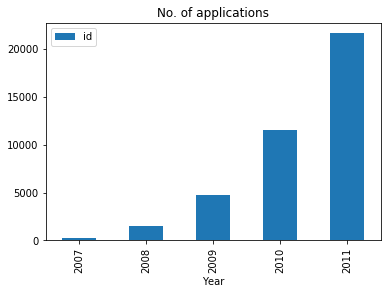

In [145]:
#Loan Applications against the years
plt.figure(figsize=(18,6))
year_split.plot.bar().set_title("No. of applications")

## Perform Outlier Treatment

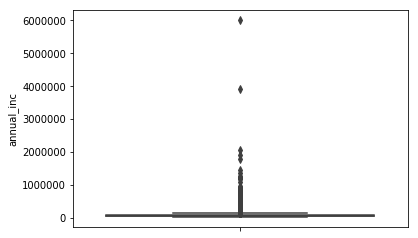

In [146]:
# Perform Outlier Analysis for 'annual_inc' column

sns.boxplot(y=df['annual_inc'])
plt.show()

In [147]:
# remove points having extreme values
df = df[(df.annual_inc < 3700000)]

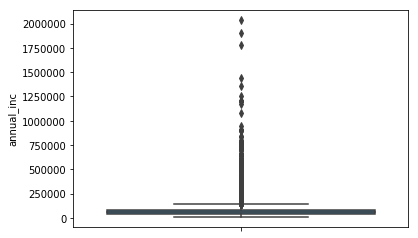

In [148]:
# Cleaned Dataset

sns.boxplot(y=df['annual_inc'])
plt.show()

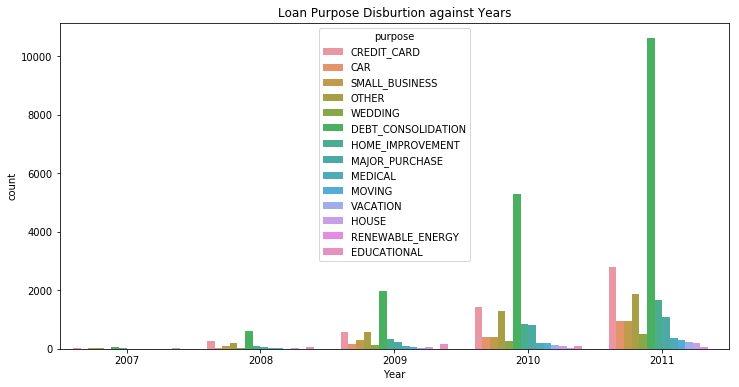

In [149]:
#loan Purpose Disburtion against Years
plt.figure(figsize=(12, 6))
sns.countplot(x='Year',hue='purpose',data=df).set_title("Loan Purpose Disburtion against Years")
plt.show()

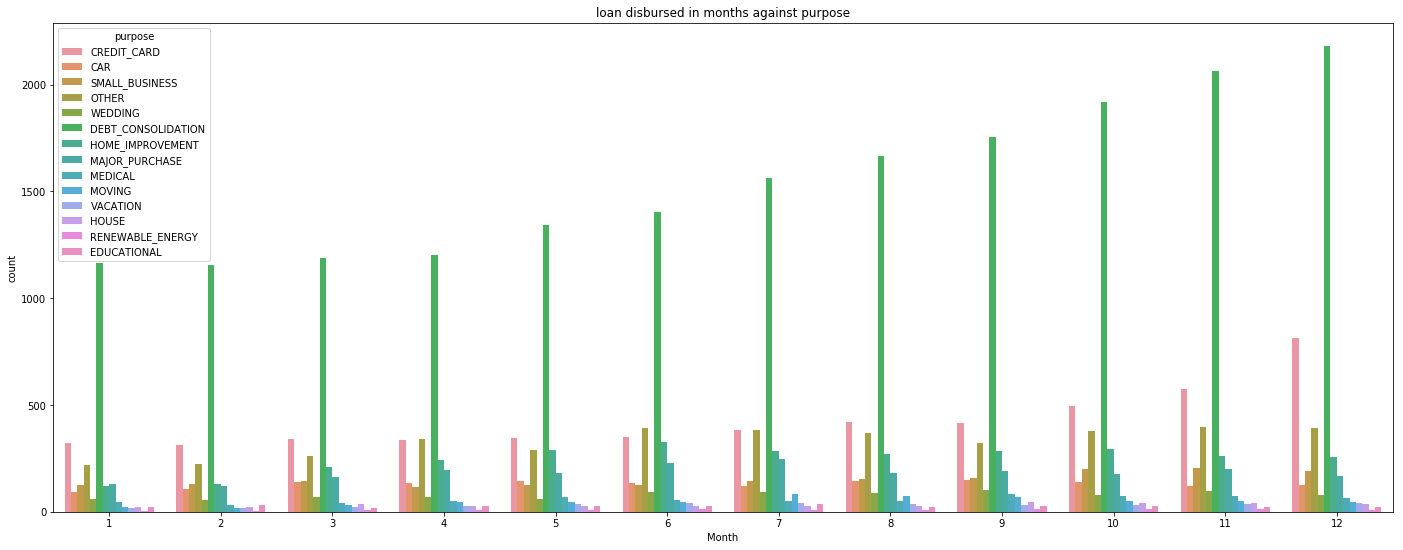

In [150]:
#loan disbursed in months against purpose
plt.figure(figsize=(24, 9))
sns.countplot(x='Month',hue='purpose',data=df).set_title("loan disbursed in months against purpose")
plt.show()

Text(0.5,1,'loan status against the years')

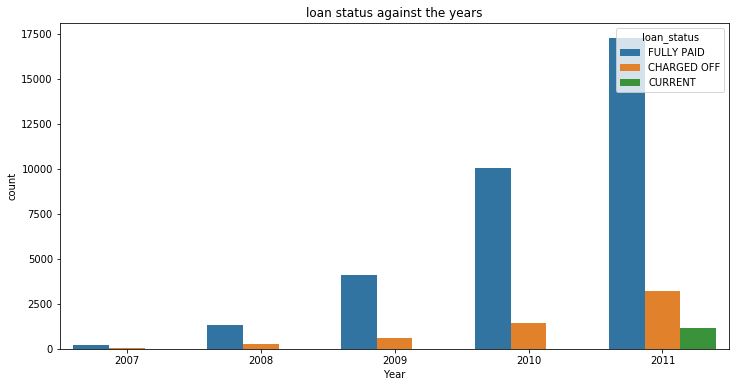

In [151]:
#Loan Status agianst the years
plt.figure(figsize=(12, 6))
sns.countplot(x='Year',hue='loan_status',data=df).set_title("loan status against the years")

Text(0.5,1,'Loan grades against the loan status')

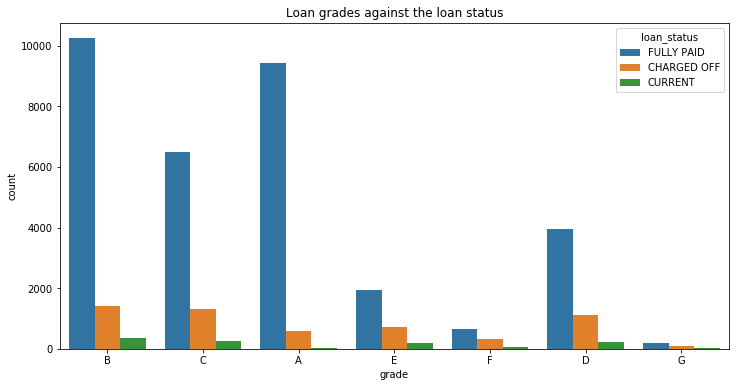

In [152]:
#Loan grades against the loan status
plt.figure(figsize=(12, 6))
sns.countplot(x='grade',hue='loan_status',data=df).set_title("Loan grades against the loan status")

Text(0.5,1,'Loan Grades against the Purpose of the loan')

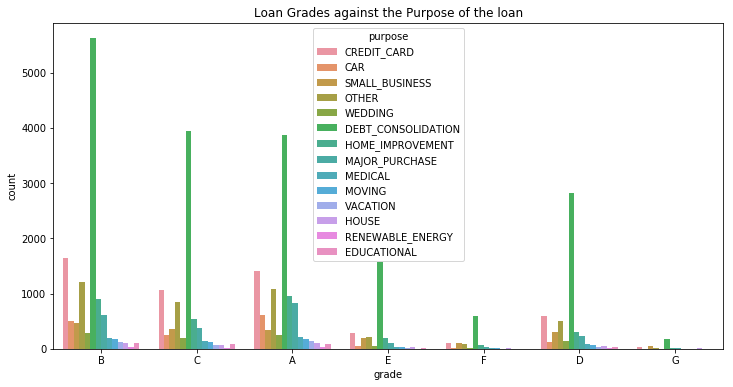

In [153]:
#Loan Grades against the Purpose of the loan
plt.figure(figsize=(12, 6))
sns.countplot(x='grade',hue='purpose',data=df).set_title("Loan Grades against the Purpose of the loan")

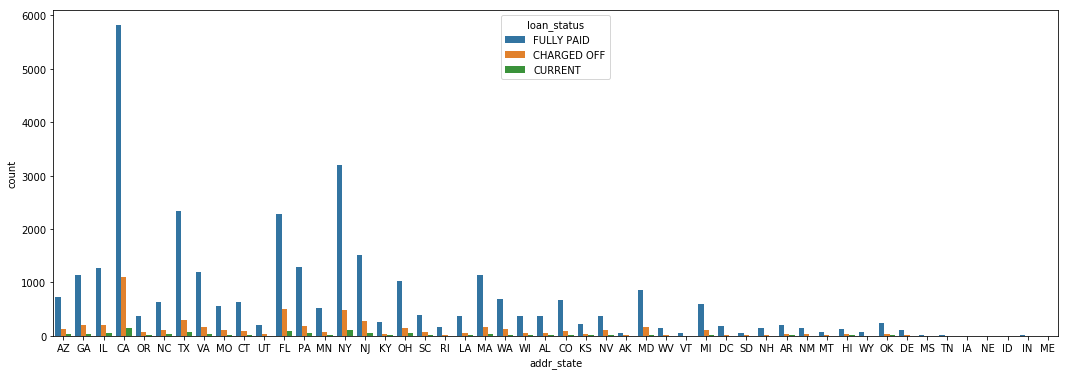

In [154]:
#Address states against the loan status
plt.figure(figsize=(18, 6))
sns.countplot(x='addr_state',hue='loan_status',data=df)

Text(0.5,1,'Interest Rate by loan grade')

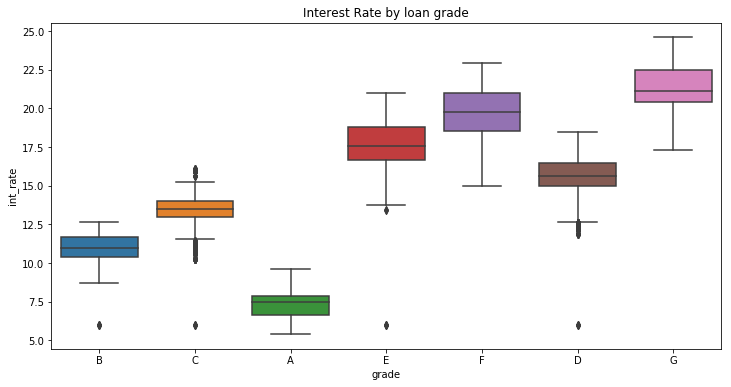

In [155]:
#Interest Rate by loan grade
plt.figure(figsize=(12, 6))
sns.boxplot(x='grade',y='int_rate',data=df).set_title("Interest Rate by loan grade")

Text(0.5,1,'loan amount by grade')

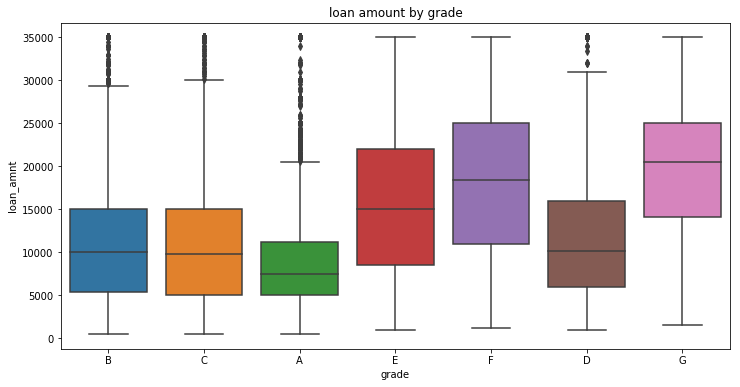

In [156]:
#Interest Rate by loan grade
plt.figure(figsize=(12, 6))
sns.boxplot(x='grade',y='loan_amnt',data=df).set_title("loan amount by grade")

Text(0.5,1,'dti by grade')

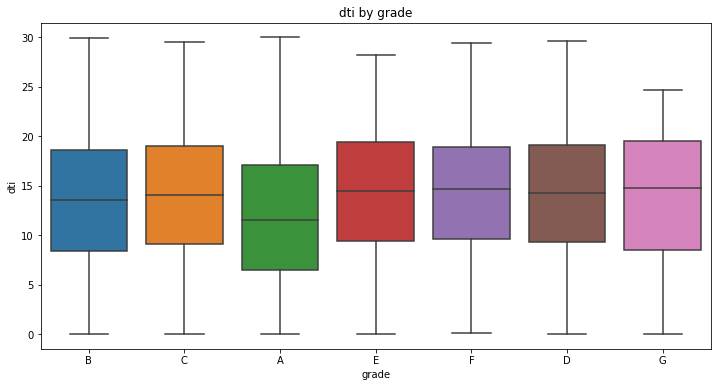

In [157]:
#Interest Rate by loan grade
plt.figure(figsize=(12, 6))
sns.boxplot(x='grade',y='dti',data=df).set_title("dti by grade")

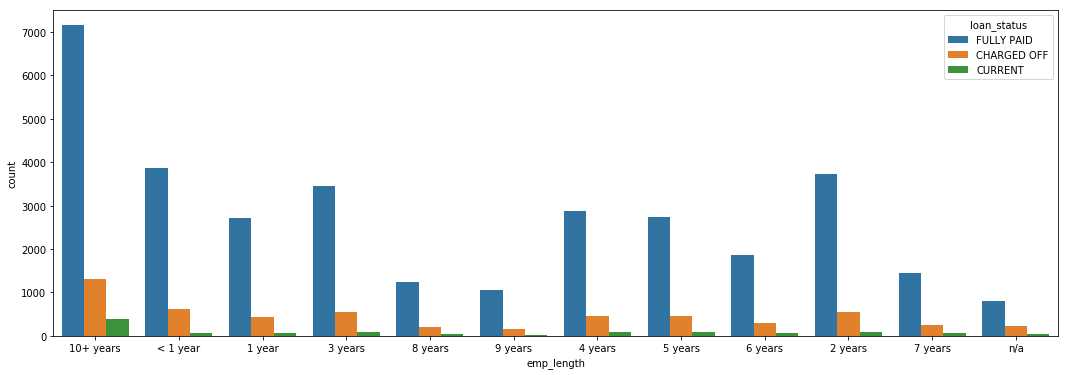

In [158]:
#Address states against the loan status
plt.figure(figsize=(18, 6))
sns.countplot(x='emp_length',hue='loan_status',data=df)

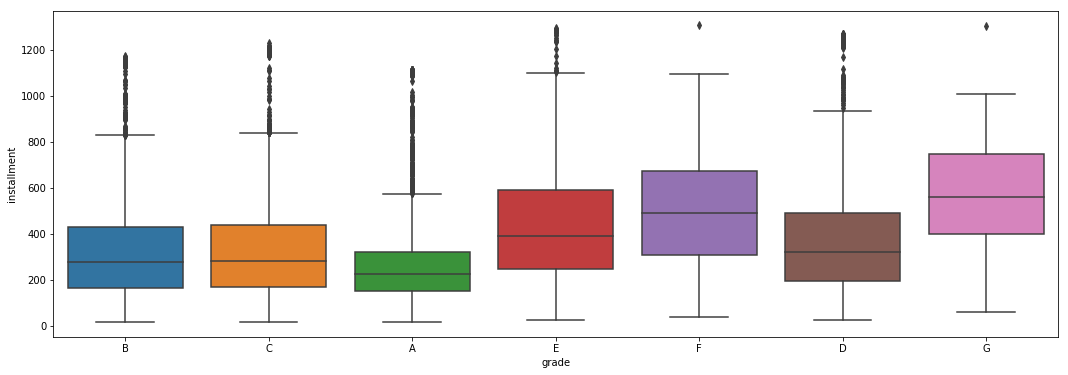

In [159]:
plt.figure(figsize=(18, 6))
sns.boxplot(x='grade',y='installment',data=df)

In [160]:
# Subsetting only the closing prices column for plotting
gramener = df[["annual_inc","loan_amnt","funded_amnt","dti"]]
gramener.head()

annual_inc  loan_amnt  funded_amnt    dti
0     24000.0       5000         5000  27.65
1     30000.0       2500         2500   1.00
2     12252.0       2400         2400   8.72
3     49200.0      10000        10000  20.00
4     80000.0       3000         3000  17.94

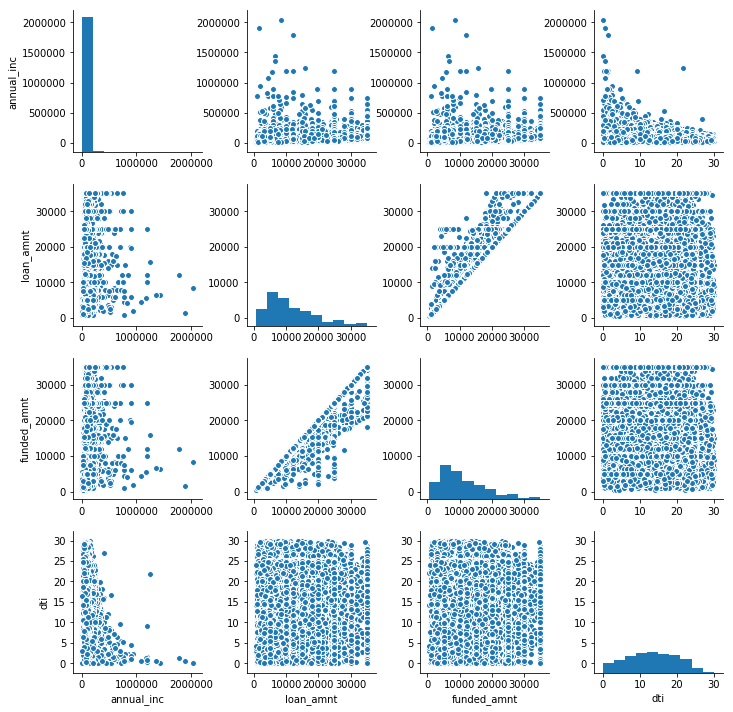

In [161]:
# pairplot
sns.pairplot(gramener)
plt.show()

In [162]:
# You can also observe the correlation between the variables
# using df.corr()
cor = gramener.corr()
round(cor, 3)

annual_inc  loan_amnt  funded_amnt    dti
annual_inc        1.000      0.325        0.322 -0.139
loan_amnt         0.325      1.000        0.982  0.066
funded_amnt       0.322      0.982        1.000  0.066
dti              -0.139      0.066        0.066  1.000

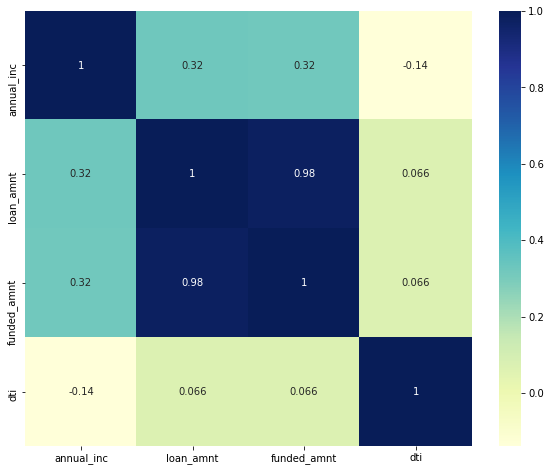

In [163]:
# Plot a Heatmap to understand the Co-relation
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

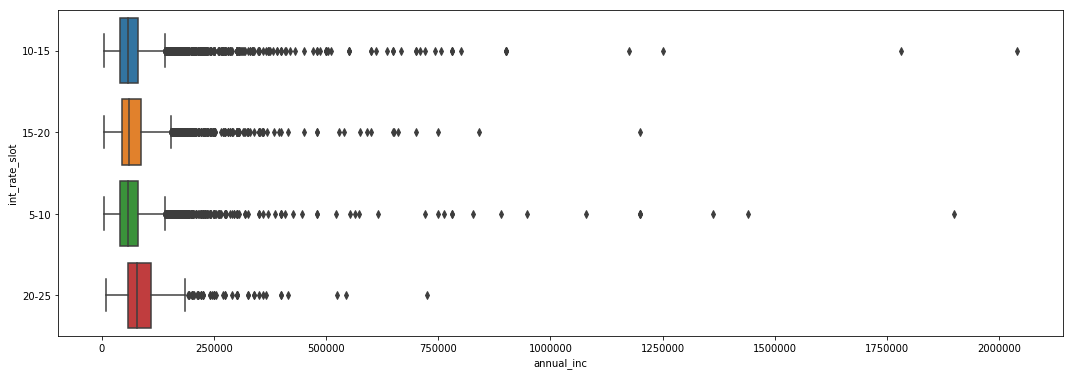

In [165]:
# Create a Box_plot to understand the Spread of Data
plt.figure(figsize=(18, 6))
sns.boxplot(x='annual_inc',y='int_rate_slot',data=df)